## 实验介绍

### 1.实验内容

本实验介绍PCA算法。并使用python实现该算法。

### 2.实验目标

通过本实验掌握PCA算法。

### 3.实验知识点

* PCA算法

### 4.实验环境

* python 3.6.5
* sklearn 0.19.1
* CourseGrading在线实验环境

### 5.预备知识

* 初等数学知识
* Linux命令基本操作
* Python编程基础
* kNN算法原理


## 准备工作

点击屏幕右上方的下载实验数据模块，选择下载pca_algo.tgz到指定目录下，然后再依次选择点击上方的File->Open->Upload,上传刚才下载的数据集压缩包，再使用如下命令解压：

In [1]:
!tar -zxvf pca_algo.tgz

pca_algo/
pca_algo/testSet.txt


## 【原理】PCA算法 
在本节，我们将接触对真实数据的处理问题。

在许多领域的研究与应用中，往往需要对反映事物的多个变量进行大量的观测，收集大量数据以便进行分析寻找规律。多变量大样本无疑会为研究和应用提供了丰富的信息，但也在一定程度上增加了数据采集的工作量，更重要的是在多数情况下，许多变量之间可能存在相关性，从而增加了问题分析的复杂性，同时对分析带来不便。如果分别对每个指标进行分析，分析往往是孤立的，而不是综合的。盲目减少指标会损失很多信息，容易产生错误的结论。

降维是对数据高维度特征的一种预处理方法。降维是将高维度的数据保留下最重要的一些特征，去除噪声和不重要的特征，从而实现提升数据处理速度的目的。在实际的生产和应用中，降维在一定的信息损失范围内，可以为我们节省大量的时间和成本。降维也成为了应用非常广泛的数据预处理方法。

## 【原理】PCA算法原理 
### 1.PCA算法

PCA(principal Component Analysis)，即主成分分析方法，是一种使用最广泛的数据压缩算法。在PCA中，数据从原来的坐标系转换到新的坐标系，由数据本身决定。转换坐标系时，以方差最大的方向作为坐标轴方向，因为数据的最大方差给出了数据的最重要的信息。第一个新坐标轴选择的是原始数据中方差最大的方法，第二个新坐标轴选择的是与第一个新坐标轴正交且方差次大的方向。重复该过程，重复次数为原始数据的特征维数。

通过这种方式获得的新的坐标系，我们发现，大部分方差都包含在前面几个坐标轴中，后面的坐标轴所含的方差几乎为0,。于是，我们可以忽略余下的坐标轴，只保留前面的几个含有绝不部分方差的坐标轴。事实上，这样也就相当于只保留包含绝大部分方差的维度特征，而忽略包含方差几乎为0的特征维度，也就实现了对数据特征的降维处理。

那么，我们如何得到这些包含最大差异性的主成分方向呢？事实上，通过计算数据矩阵的协方差矩阵，然后得到协方差矩阵的特征值及特征向量，选择特征值最大（也即包含方差最大）的N个特征所对应的特征向量组成的矩阵，我们就可以将数据矩阵转换到新的空间当中，实现数据特征的降维（N维）。

说到这里，可能会疑惑，为什么要计算数据矩阵的协方差矩阵呢？

回顾一下，协方差的意义：计算数据各维度之间的相关性、度量两个随机变量关系的统计量、度量各个维度偏离其均值的程度。而协方差矩阵则是，其每一个因子都可以视为两个不同随机变量的关系，也就是好多协方差凑在一起形成了协方差矩阵，用来衡量各个变量之间的紧密程度。计算协方差的公式：
![](1_pca_algo.png)
PCA算法的实质就是在能尽可能好的代表原特征的情况下，将原特征进行线性变换、映射至低纬度空间中。

## 【原理】PCA实例 
### 2.PCA实例

现在假设有一组数据如下：

行代表了样例，列代表特征，这里有10个样例，每个样例两个特征。可以这样认为，有10篇文档，x是10篇文档中“learn”出现的TF-IDF，y是10篇文档“study”出现的TF-IDF。
![](2_pca_algo.png)
    第一步，分别求x和y的平均值，然后对于所有的样例，都减去对应的均值。这里x的均值是1.81，y的均值是1.91，那么一个样例减去均值后即为（0.69,0.49），得到
![](3_pca_algo.png)
    第二步，求特征协方差矩阵，如果数据是3维，那么协方差矩阵是
![](4_pca_algo.png)
    这里只有x和y，求解得
![](5_pca_algo.png)
    对角线上分别是x和y的方差，非对角线上是协方差。协方差是衡量两个变量同时变化的变化程度。协方差大于0表示x和y若一个增，另一个也增；小于0表示一个增，一个减。如果ｘ和ｙ是统计独立的，那么二者之间的协方差就是０；但是协方差是０，并不能说明ｘ和ｙ是独立的。协方差绝对值越大，两者对彼此的影响越大，反之越小。协方差是没有单位的量，因此，如果同样的两个变量所采用的量纲发生变化，它们的协方差也会产生树枝上的变化。

   第三步，求协方差的特征值和特征向量，得到
![](6_pca_algo.png)
     上面是两个特征值，下面是对应的特征向量，特征值0.0490833989对应特征向量为，这里的特征向量都归一化为单位向量。

   第四步，将特征值按照从大到小的顺序排序，选择其中最大的k个，然后将其对应的k个特征向量分别作为列向量组成特征向量矩阵。这里特征值只有两个，我们选择其中最大的那个，这里是1.28402771，对应的特征向量是(-0.677873399, -0.735178656)T。

   第五步，将样本点投影到选取的特征向量上。假设样例数为m，特征数为n，减去均值后的样本矩阵为DataAdjust(m*n)，协方差矩阵是n*n，选取的k个特征向量组成的矩阵为EigenVectors(n*k)。那么投影后的数据FinalData为
![](7_pca_algo.png)
这里是：
                     FinalData(10*1) = DataAdjust(10*2矩阵) x 特征向量(-0.677873399, -0.735178656)T

得到的结果是：
![](8_pca_algo.png)
这样，就将原始样例的n维特征变成了k维，这k维就是原始特征在k维上的投影。

上面的数据可以认为是learn和study特征融合为一个新的特征叫做LS特征，该特征基本上代表了这两个特征。上述过程如下图2描述：
![](9_pca_algo.png)
正号表示预处理后的样本点，斜着的两条线就分别是正交的特征向量（由于协方差矩阵是对称的，因此其特征向量正交），最后一步的矩阵乘法就是将原始样本点分别往特征向量对应的轴上做投影。

如果取的k=2，那么结果是
![](10_pca_algo.png)
这就是经过PCA处理后的样本数据，水平轴（上面举例为LS特征）基本上可以代表全部样本点。整个过程看起来就像将坐标系做了旋转，当然二维可以图形化表示，高维就不行了。上面的如果k=1，那么只会留下这里的水平轴，轴上是所有点在该轴的投影。这样PCA的过程基本结束。在第一步减均值之后，其实应该还有一步对特征做方差归一化。比如一个特征是汽车速度（0到100），一个是汽车的座位数（2到6），显然第二个的方差比第一个小。因此，如果样本特征中存在这种情况，那么在第一步之后，求每个特征的标准差，然后对每个样例在该特征下的数据除以标准差。

## 【实验】Numpy实现PCA算法 
我们从上一节的理论中可以归纳出PCA算法的工作流程：

    计算协方差矩阵
    计算协方差矩阵的特征值和特征向量
    将特征值排序
    保留前N个最大的特征值对应的特征向量
    将数据转换到上面得到的N个特征向量构建的新空间中
说到这里，我们来用代码实现一下，这里我们需要用到python强大的Numpy库，用来直接求解矩阵的特征向量和特征值。奇妙！

在得到我们需要的特征向量后，需要对数据进行映射，计算方法为：
![](11_pca_algo.png)
向量e为通过点m处的某条直线的方向向量，α为某个样本点至点m处的距离。先来看一下源数据集的数据分布情况：
![](12_pca_algo.png)
我们现在要对这个二维数据集降维。添加如下代码：

降维后的矩阵形状：
 (1000, 1)


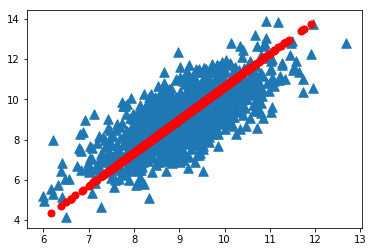

In [3]:
from numpy import *
import matplotlib.pyplot as plt
"""
函数说明：加载数据集
parameters:
    fileName -文件名
    delim -分隔符
return:
    mat(datArr) -数据矩阵
"""
def loadDataSet(fileName, delim = '\t'):
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]      #对读入数据以\t分隔存储到列表中
    datArr = [list(map(float,line)) for line in stringArr]   #使用两个list来构建矩阵
    return mat(datArr)
"""
函数说明：PCA算法实现
parameters:
    dataMat -用于进行PCA操作的数据集
    topNfeat -应用的N个特征
return:
    lowDataMat -将维后的数据集
    reconMat -重构的数据集（用于调试）
"""
def pca(dataMat, topNfeat = 9999999):
    meanVals = mean(dataMat, axis = 0)  #计算数据平均值
    meanRemoved = dataMat - meanVals    #去中心化
    covMat = cov(meanRemoved, rowvar = 0 ) #计算协方差
    eigVals, eigVects = linalg.eig(mat(covMat)) #计算协方差矩阵的特征值和特征向量
    eigValInd = argsort(eigVals) #对特征值从小到大排序，并提取对应的index
    eigValInd = eigValInd[:-(topNfeat+1):-1]    #对特征排序结果逆序
    redEigVects = eigVects[:,eigValInd]     #根据特征值排序结果得到topNfeat个最大的特征向量
    lowDataMat = meanRemoved * redEigVects              #数据降维
    reconMat = (lowDataMat * redEigVects.T) + meanVals  #数据重构（对比上面的计算公式）
    return lowDataMat, reconMat
"""
函数说明：绘制数据集
parameters:
    dataMat -原始数据集
    reconMat -重构数据集
return:
    None
"""
def drawDataSet(dataMat, reconMat):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(dataMat[:,0].flatten().A[0], dataMat[:,1].flatten().A[0], marker='^',s=90)
    ax.scatter(reconMat[:,0].flatten().A[0], reconMat[:,1].flatten().A[0], marker='o',s=50,c='red')
    plt.show()

if __name__ =='__main__':
    dataMat = loadDataSet('pca_algo/testSet.txt')
    lowDMat, reconMat = pca(dataMat,1)
    print("降维后的矩阵形状：\n",shape(lowDMat))
    drawDataSet(dataMat, reconMat)

运行后，我们可以看到红色的数据即为我们降维后的数据，且降维后的矩阵为一维矩阵。图中蓝色点为原始数据集，红色点为我们处理后得到的第一主成分。

## 【实验】使用sklearn实现PCA算法 
本节我们使用python强大的机器学习库sklearn来实现PCA算法。在scikit-learn中，与PCA相关的类都在sklearn.decomposition包中。最常用的PCA类就是sklearn.decomposition.PCA，我们下面主要也会讲解基于这个类的使用的方法。除了PCA类以外，最常用的PCA相关类还有KernelPCA类，它主要用于非线性数据的降维，需要用到核技巧。因此在使用的时候需要选择合适的核函数并对核函数的参数进行调参。

另外一个常用的PCA相关类是IncrementalPCA类，它主要是为了解决单机内存限制的。有时候我们的样本量可能是上百万+，维度可能也是上千，直接去拟合数据可能会让内存爆掉， 此时我们可以用IncrementalPCA类来解决这个问题。IncrementalPCA先将数据分成多个batch，然后对每个batch依次递增调用partial_fit函数，这样一步步的得到最终的样本最优降维。

此外还有SparsePCA和MiniBatchSparsePCA。他们和上面讲到的PCA类的区别主要是使用了L1的正则化，这样可以将很多非主要成分的影响度降为0，这样在PCA降维的时候我们仅仅需要对那些相对比较主要的成分进行PCA降维，避免了一些噪声之类的因素对我们PCA降维的影响。SparsePCA和MiniBatchSparsePCA之间的区别则是MiniBatchSparsePCA通过使用一部分样本特征和给定的迭代次数来进行PCA降维，以解决在大样本时特征分解过慢的问题，当然，代价就是PCA降维的精确度可能会降低。使用SparsePCA和MiniBatchSparsePCA需要对L1正则化参数进行调参。

下面我们主要基于sklearn.decomposition.PCA来讲解如何使用scikit-learn进行PCA降维。
![](13_pca_algo.png)
PCA类基本不需要调参，一般来说，我们只需要指定我们需要降维到的维度，或者我们希望降维后的主成分的方差和占原始维度所有特征方差和的比例阈值就可以了。

参数：

    1）n_components：这个参数可以帮我们指定希望PCA降维后的特征维度数目。

    2）whiten ：判断是否进行白化。所谓白化，就是对降维后的数据的每个特征进行归一化，让方差都为1。对于PCA降维本身来说，一般不需要白化。如果你PCA降维后有后续的数据处理动作，可以考虑白化。默认值是False，即不进行白化。

    3）svd_solver：即指定奇异值分解SVD的方法，由于特征分解是奇异值分解SVD的一个特例，一般的PCA库都是基于SVD实现的。可以选择的值：{‘auto’, ‘full’, ‘arpack’, ‘randomized’}。默认是auto，即PCA类会自己去权衡，选择一个合适的SVD算法来降维。

返回值：

    1）explained_variance_，它代表降维后的各主成分的方差值。方差值越大，则说明越是重要的主成分。

    2）explained_variance_ratio_，它代表降维后的各主成分的方差值占总方差值的比例，这个比例越大，则越是重要的主成分。

函数：

    1）fit(X) -用数据X训练模型

    2）transform(X) -数据降维操作。X被投射到提取的第一主成分上


了解了这么多，下面我们使用sklearn实现对iris数据应用PCA算法的降维。Iris数据集是常用的分类实验数据集。Iris也称鸢尾花卉数据集，是一类多重变量分析的数据集。数据集包含150个数据集，分为3类，每类50个数据，每个数据包含4个属性。可通过花萼长度，花萼宽度，花瓣长度，花瓣宽度4个属性预测鸢尾花卉属于（Setosa，Versicolour，Virginica）三个种类中的哪一类。

具体的数据如下：
![](14_pca_algo.png)

添加以下代码：

前两个主成分的方差占总方差的比例：
 [ 0.92461872  0.05306648]


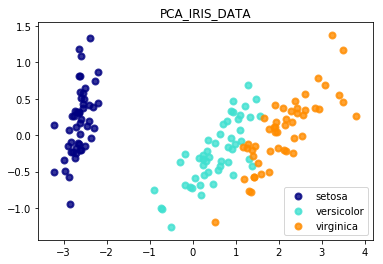

In [5]:
from numpy import *
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

#加载数据集和分类结果
iris = datasets.load_iris()
X = iris.data
y = iris.target
targetNames = iris.target_names

#构建pca模型
pca = PCA(n_components=2)    #此处可修改想要降维的维度
X_r = pca.fit(X).transform(X)
print("前两个主成分的方差占总方差的比例：\n",pca.explained_variance_ratio_)

#绘制结果图
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2  #linewidth

for color, i, targetName in zip(colors,[0,1,2],targetNames):
    plt.scatter(X_r[y==i,0],X_r[y==i,1],color=color,alpha=.8,lw=lw,label=targetName)
    #x = linspace(-3,4,50)   #取自变量X
    #plt.plot(x,X_r[y==i,0],color=color,alpha=.8)    #此处当维度为1时，可查看1维数据

plt.legend(loc='best',shadow=False,scatterpoints=1)
plt.title('PCA_IRIS_DATA')
plt.show()

运行后我们可以看到，对三种不同花卉的数据集进行降维后的数据分布情况。由方差比例可以看出，第一个特征占了总方差比例的92.4%。

同学们可以试着将pca模型的n_components参数修改为1，注释散点图函数，并对直线方程去掉#。

前两个主成分的方差占总方差的比例：
 [ 0.92461872]


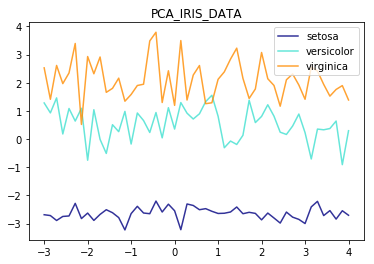

In [7]:
from numpy import *
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

#加载数据集和分类结果
iris = datasets.load_iris()
X = iris.data
y = iris.target
targetNames = iris.target_names

#构建pca模型
pca = PCA(n_components=1)    #此处可修改想要降维的维度
X_r = pca.fit(X).transform(X)
print("前两个主成分的方差占总方差的比例：\n",pca.explained_variance_ratio_)

#绘制结果图
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2  #linewidth

for color, i, targetName in zip(colors,[0,1,2],targetNames):
    #plt.scatter(X_r[y==i,0],X_r[y==i,1],color=color,alpha=.8,lw=lw,label=targetName)
    x = linspace(-3,4,50)   #取自变量X
    plt.plot(x,X_r[y==i,0],color=color,alpha=.8,label=targetName)    #此处当维度为1时，可查看1维数据

plt.legend(loc='best',shadow=False,scatterpoints=1)
plt.title('PCA_IRIS_DATA')
plt.show()

运行后，可以看到如下结果，此时我们只保留的第一主成分。到此，我们就可以愉快的使用PCA对数据进行处理啦！

## 实验总结

本节我们介绍了PCA算法，并介绍了如何使用python以及skleran库实现该算法，您应该能达到以下两个目标：

1. 掌握PCA算法。

2. 学会实现相应算法。

##  参考文献及延伸阅读 

### 参考资料：

1.哈林顿，李锐. 机器学习实战 : Machine learning in action[M]. 人民邮电出版社, 2013.  
2.周志华. 机器学习:Machine learning[M]. 清华大学出版社, 2016.

### 延伸阅读：

1.李航. 统计学习方法[M]. 清华大学出版社, 2012.